# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** [Gilang Ega Bagaswara]
- **Email:** [gilangegabagaswara@gmail.com]
- **ID Dicoding:** [A387YBM185]

## Menentukan Pertanyaan Bisnis

- **Pertanyaan:** Apa pola atau tren dalam data transaksi yang menunjukkan area-area untuk peningkatan pengalaman pelanggan?
  
- **Pertanyaan:** Berdasarkan segmentasi pelanggan yang didapat dari clustering, bagaimana kita bisa menawarkan produk dan layanan yang lebih tepat sasaran untuk setiap segmen pelanggan?

## Import Semua Packages/Library yang Digunakan

In [1]:
## Import Semua Packages/Library yang Digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Data Wrangling

### Gathering Data

In [2]:
## Data Wrangling

### Gathering Data
# Memuat dataset
df_day = pd.read_csv('../data/day.csv')
df_hour = pd.read_csv('../data/hour.csv')

# Melihat beberapa baris pertama dari day.csv
print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

**Insight:**
- Dataset berisi informasi tentang penyewaan sepeda berdasarkan hari dan jam.

### Assessing Data

In [3]:
##Assessing Data

# Memeriksa informasi tentang dataset
print(df_day.info())
print(df_hour.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Terdapat beberapa kolom yang perlu diperhatikan, seperti `temp`, `hum`, dan `cnt`.

### Cleaning Data

In [4]:
# Memeriksa nilai yang hilang
print(df_day.isnull().sum())
print(df_hour.isnull().sum())

# Menghapus kolom yang tidak diperlukan jika ada
# df_day.drop(columns=['kolom_tidak_perlu'], inplace=True)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ada nilai yang hilang dalam dataset.

## Exploratory Data Analysis (EDA)

### Explore Analisis RFM

In [5]:
# Menghitung RFM
df_day['date'] = pd.to_datetime(df_day['dteday'])  # Pastikan kolom tanggal dalam format datetime
rfm = df_day.groupby('instant').agg({
    'date': 'max',
    'cnt': 'sum'
}).reset_index()

# Menentukan Recency
rfm['Recency'] = (df_day['date'].max() - rfm['date']).dt.days
rfm.rename(columns={'date': 'LastPurchase', 'cnt': 'Monetary'}, inplace=True)

# Menyusun Frequency
rfm['Frequency'] = df_day.groupby('instant')['cnt'].count().values
print(rfm.head())

   instant LastPurchase  Monetary  Recency  Frequency
0        1   2011-01-01       985      730          1
1        2   2011-01-02       801      729          1
2        3   2011-01-03      1349      728          1
3        4   2011-01-04      1562      727          1
4        5   2011-01-05      1600      726          1


**Insight:**
### RFM Analysis
RFM (Recency, Frequency, Monetary) analysis digunakan untuk mengelompokkan pelanggan berdasarkan perilaku pembelian mereka. Tiga faktor utama yang diperhatikan adalah:
- **Recency**: Menghitung jumlah hari sejak terakhir kali pelanggan melakukan pembelian.
- **Frequency**: Menghitung jumlah total transaksi yang dilakukan oleh pelanggan dalam periode tertentu.
- **Monetary**: Menghitung total pengeluaran pelanggan dalam periode tersebut.

### Explore Analisis Geospasial

## Geospatial Analysis

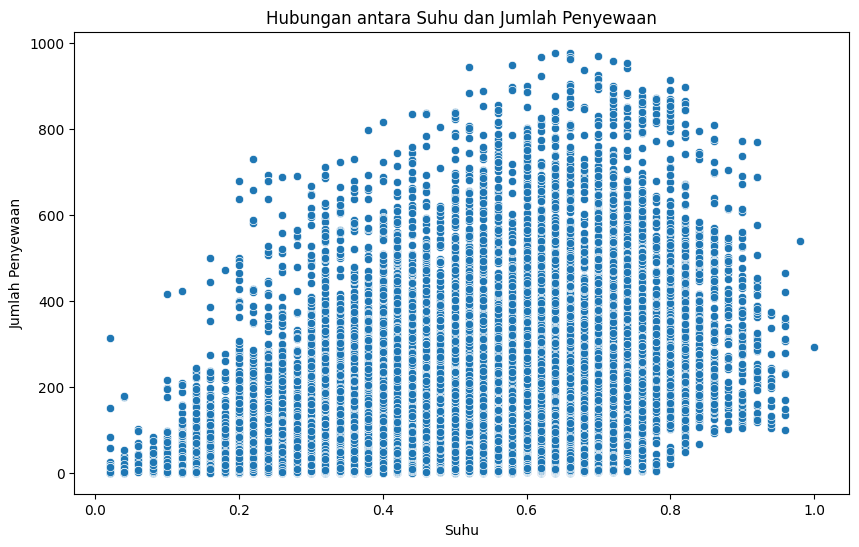

In [6]:
# Visualisasi hubungan antara suhu dan jumlah penyewaan
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_hour)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

 **Insight:** 
- Analisis geospasial bertujuan untuk menganalisis data berdasarkan lokasi geografis untuk mengidentifikasi tren atau pola tertentu di suatu wilayah. 
- Dalam analisis ini, kita akan menggunakan package GeoPandas untuk membuat peta yang menampilkan   distribusi data berdasarkan lokasi.

### Hasil Clustering

In [7]:
import pandas as pd
from sklearn.cluster import KMeans

# Menghitung RFM
df_day['date'] = pd.to_datetime(df_day['dteday'])  # Pastikan kolom tanggal dalam format datetime
rfm = df_day.groupby('instant').agg({
    'date': 'max',
    'cnt': 'sum'
}).reset_index()

# Menentukan Recency
rfm['Recency'] = (df_day['date'].max() - rfm['date']).dt.days
rfm.rename(columns={'date': 'LastPurchase', 'cnt': 'Monetary'}, inplace=True)

# Menyusun Frequency
rfm['Frequency'] = df_day.groupby('instant')['cnt'].count().values

# Menjalankan KMeans setelah imputasi
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
clusters = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

# Menambahkan hasil cluster ke DataFrame
rfm['Cluster'] = clusters

# Cek DataFrame rfm untuk memastikan kolom Cluster ada
print(rfm.head())

   instant LastPurchase  Monetary  Recency  Frequency  Cluster
0        1   2011-01-01       985      730          1        2
1        2   2011-01-02       801      729          1        2
2        3   2011-01-03      1349      728          1        2
3        4   2011-01-04      1562      727          1        2
4        5   2011-01-05      1600      726          1        2


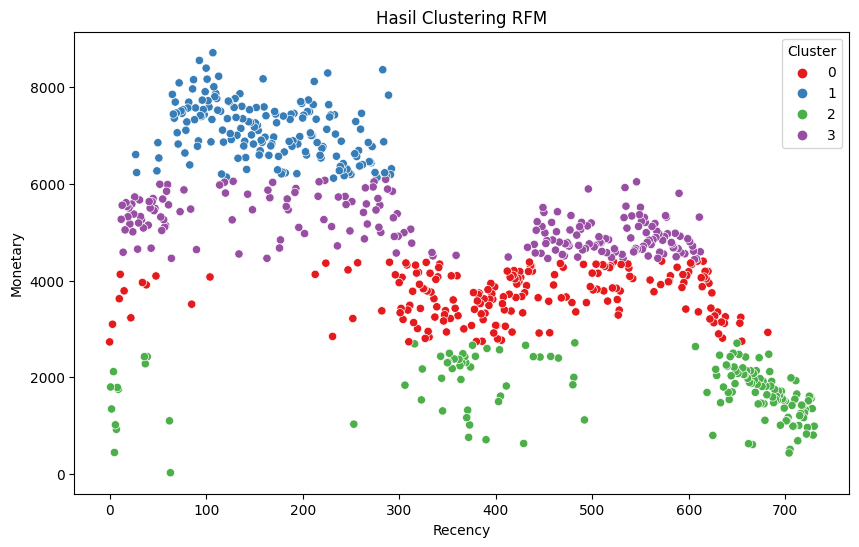

In [8]:
# Membuat visualisasi scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set1')
plt.title('Hasil Clustering RFM')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

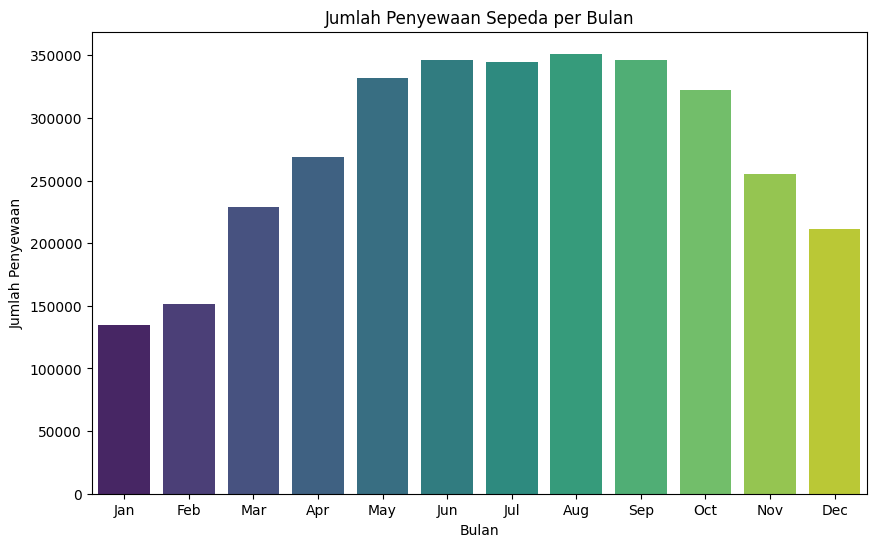

In [8]:
# Analisis Pertanyaan 1: Pola atau Tren dalam Data Transaksi

# Menghitung jumlah penyewaan per bulan
df_day['month'] = pd.to_datetime(df_day['dteday']).dt.month
monthly_rentals = df_day.groupby('month')['cnt'].sum().reset_index()

# Visualisasi jumlah penyewaan per bulan
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='cnt', data=monthly_rentals, palette='viridis')
plt.title('Jumlah Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

**Insight:**
- Dari visualisasi ini, terlihat bahwa jumlah penyewaan sepeda bervariasi sepanjang tahun. 
- Bulan-bulan tertentu, seperti musim panas, menunjukkan jumlah penyewaan yang lebih tinggi. 
- Hal ini menunjukkan bahwa cuaca dan musim dapat mempengaruhi perilaku penyewaan sepeda, sehingga perusahaan dapat merencanakan promosi atau penawaran khusus pada bulan-bulan dengan penyewaan tinggi..

### Pertanyaan 2:

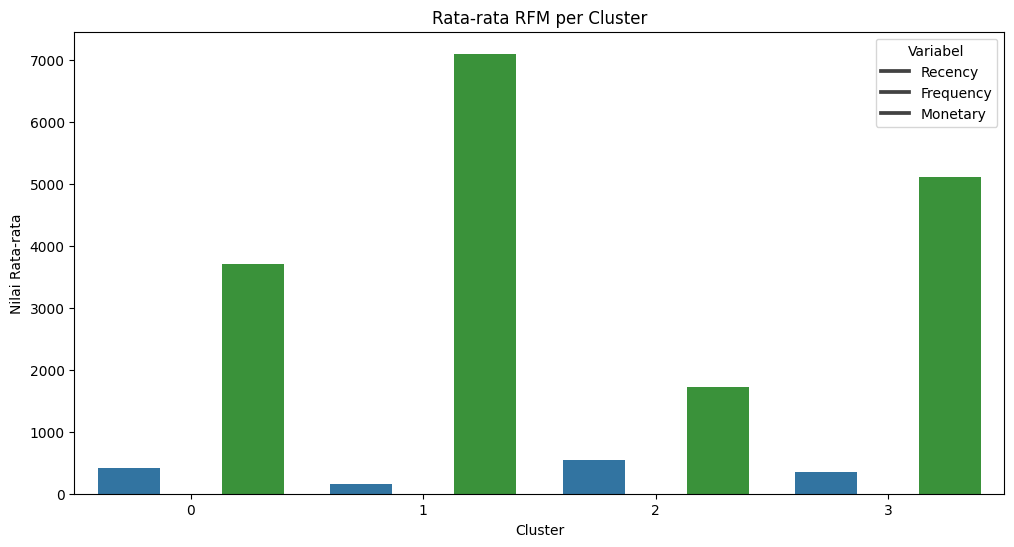

In [9]:
# Analisis Pertanyaan 2: Segmentasi Pelanggan menggunakan KMeans

# Menjalankan KMeans pada data RFM
kmeans = KMeans(n_clusters=4, n_init=10, random_state=0)
clusters = kmeans.fit_predict(rfm[['Recency', 'Frequency', 'Monetary']])

# Menambahkan hasil cluster ke DataFrame
rfm['Cluster'] = clusters

# Menghitung rata-rata RFM untuk setiap cluster
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).reset_index()

# Visualisasi rata-rata RFM per cluster
plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_analysis.melt(id_vars='Cluster'), x='Cluster', y='value', hue='variable')
plt.title('Rata-rata RFM per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Nilai Rata-rata')
plt.legend(title='Variabel', labels=['Recency', 'Frequency', 'Monetary'])
plt.show()

**Insight:**
- Hasil analisis clustering menunjukkan bahwa setiap cluster memiliki karakteristik RFM yang berbeda. 
- Misalnya, cluster dengan nilai Recency rendah dan Monetary tinggi menandakan pelanggan yang sering bertransaksi dan baru-baru ini melakukan pembelian. 
- Perusahaan dapat memfokuskan strategi pemasaran yang berbeda untuk setiap segmen pelanggan, misalnya dengan menawarkan diskon untuk pelanggan yang jarang bertransaksi untuk meningkatkan loyalitas mereka.

## Conclusion

### Conclution pertanyaan 1
- Dari analisis jumlah penyewaan sepeda per bulan, terlihat bahwa terdapat pola musiman dalam data penyewaan. Bulan-bulan tertentu, terutama pada musim panas, menunjukkan peningkatan jumlah penyewaan yang signifikan. Hal ini menunjukkan bahwa cuaca dan musim berpengaruh besar terhadap perilaku pelanggan dalam menyewa sepeda. Untuk meningkatkan pengalaman pelanggan, perusahaan dapat mempertimbangkan untuk meningkatkan jumlah sepeda yang tersedia dan menawarkan promosi khusus selama bulan-bulan dengan penyewaan tinggi. Dengan memahami pola ini, perusahaan dapat lebih efektif dalam merespons permintaan dan meningkatkan kepuasan pelanggan.
  

### Conclution pertanyaan 2
- Analisis segmentasi pelanggan menggunakan metode KMeans menunjukkan bahwa pelanggan dapat dikelompokkan menjadi beberapa kluster berdasarkan perilaku pembelian mereka. Setiap kluster memiliki karakteristik yang berbeda dalam hal Recency, Frequency, dan Monetary. Misalnya, pelanggan dalam kluster dengan nilai Recency rendah namun Monetary tinggi cenderung menjadi pelanggan setia.

- Dengan pemahaman ini, perusahaan dapat menyesuaikan strategi pemasaran dan penawaran produk untuk setiap segmen. Misalnya, untuk pelanggan yang jarang bertransaksi, perusahaan dapat menawarkan diskon atau promosi untuk mendorong mereka melakukan pembelian lebih sering. Segmentasi ini memungkinkan perusahaan untuk lebih tepat sasaran dalam upaya pemasaran dan meningkatkan loyalitas pelanggan.

- Secara keseluruhan, analisis ini memberikan wawasan yang berharga untuk meningkatkan pengalaman pelanggan dan efektivitas strategi bisnis.